In [1]:
from main import train_cnce, get_mnist_data, GaussianEBM, NoiseDataset
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mnist_train, mnist_test, mnist_mean = get_mnist_data("../../data", add_noise=True)

## Train using cNCE without masking precision matrix

In [29]:
precision_matrix, losses = train_cnce(batch_size=1000, mnist_data_path="../../data/", max_steps=5000)
precision_matrix = precision_matrix.cpu().detach().numpy()

Loaded 60000 training examples
0: Loss: 0.23793178728455347
1: Loss: 0.2127788939043198
2: Loss: 0.1576287755239506
3: Loss: 0.18358068874234693
4: Loss: 0.1818743579463488
5: Loss: 0.18547575008496134
6: Loss: 0.16546790625205615
7: Loss: 0.19321373814881074
8: Loss: 0.18220418408455502
9: Loss: 0.18942060638894198
10: Loss: 0.15668915729247973
11: Loss: 0.16461650498717592
12: Loss: 0.21158031947977163
13: Loss: 0.16266626381197102
14: Loss: 0.28060026653031683
15: Loss: 0.1437469392089749
16: Loss: 0.16996081506620528
17: Loss: 0.18252712451084568
18: Loss: 0.15374605363886676
19: Loss: 0.20116778666854782
20: Loss: 0.13764728386262098
21: Loss: 0.14444291423620584
22: Loss: 0.21715812390580969
23: Loss: 0.15979858890100415
24: Loss: 0.13976477385097857
25: Loss: 0.15701869505066007
26: Loss: 0.1582700906855017
27: Loss: 0.15001312753866802
28: Loss: 0.1884775632021373
29: Loss: 0.1631525893746993
30: Loss: 0.15537954583710736
31: Loss: 0.1863208242532546
32: Loss: 0.163224726056004

271: Loss: 0.03449155564049608
272: Loss: 0.03599174163952231
273: Loss: 0.035093783812107565
274: Loss: 0.03321415716011029
275: Loss: 0.0345512954504765
276: Loss: 0.03424671866920181
277: Loss: 0.03266276443734569
278: Loss: 0.0332055653118823
279: Loss: 0.03662881623258404
280: Loss: 0.03536196516151948
281: Loss: 0.03585085101567244
282: Loss: 0.038071942471281546
283: Loss: 0.035700341992957275
284: Loss: 0.034408439653263005
285: Loss: 0.036124009839269035
286: Loss: 0.03825391560149048
287: Loss: 0.034905236114465166
288: Loss: 0.03451553024498249
289: Loss: 0.039410917488415714
290: Loss: 0.03233489060514991
291: Loss: 0.03441303589872807
292: Loss: 0.03609294287378505
293: Loss: 0.030117074388810096
294: Loss: 0.032409363335932764
295: Loss: 0.0341872759873831
296: Loss: 0.033296568901241094
297: Loss: 0.03165679698485271
298: Loss: 0.03327932255882141
299: Loss: 0.034475961591147464
300: Loss: 0.028406354507858635
301: Loss: 0.030493877195955487
302: Loss: 0.0295447644475989

535: Loss: 0.021333099867659442
536: Loss: 0.019987701401433945
537: Loss: 0.01979456401073494
538: Loss: 0.02019614014599708
539: Loss: 0.020816031908469847
540: Loss: 0.018646073220142827
541: Loss: 0.019572299785509926
542: Loss: 0.01959899019748886
543: Loss: 0.018845627328221783
544: Loss: 0.0199226867004693
545: Loss: 0.020554027648330687
546: Loss: 0.019342937987355244
547: Loss: 0.020754789791636405
548: Loss: 0.020171184098301865
549: Loss: 0.019284753546250206
550: Loss: 0.018844065858918315
551: Loss: 0.020510666521256844
552: Loss: 0.019363803592574162
553: Loss: 0.019484681045372876
554: Loss: 0.019837544145833604
555: Loss: 0.01928497773702909
556: Loss: 0.02043306522953584
557: Loss: 0.019915316655285526
558: Loss: 0.01953183559095506
559: Loss: 0.019195994734054853
560: Loss: 0.02058863084388935
561: Loss: 0.018957673573858025
562: Loss: 0.019650300303321884
563: Loss: 0.018704109066024734
564: Loss: 0.020064579939537995
565: Loss: 0.020969294167921832
566: Loss: 0.0199

799: Loss: 0.013882161648045893
800: Loss: 0.014796094157475901
801: Loss: 0.013682614042250739
802: Loss: 0.013994863285764875
803: Loss: 0.013431438913405806
804: Loss: 0.014492089595758081
805: Loss: 0.015096732358070573
806: Loss: 0.014389747054581403
807: Loss: 0.013632308291374502
808: Loss: 0.013370246483263752
809: Loss: 0.01382651648047761
810: Loss: 0.014124971708633796
811: Loss: 0.013499085504413134
812: Loss: 0.013938352413169087
813: Loss: 0.014257571044715629
814: Loss: 0.01293551357372944
815: Loss: 0.013566890159617966
816: Loss: 0.0135875846184532
817: Loss: 0.013277536748308415
818: Loss: 0.013343509565069515
819: Loss: 0.01447282778187574
820: Loss: 0.013916160916031421
821: Loss: 0.013211088533204001
822: Loss: 0.014783367004910338
823: Loss: 0.01430295274938812
824: Loss: 0.013285306482370146
825: Loss: 0.013895845964908855
826: Loss: 0.013406419665043832
827: Loss: 0.013865986268478158
828: Loss: 0.013614853209099137
829: Loss: 0.013735461053305136
830: Loss: 0.0

1057: Loss: 0.010118138033423655
1058: Loss: 0.010180361431049504
1059: Loss: 0.010994004660634148
1060: Loss: 0.010564126008339888
1061: Loss: 0.010085650005417645
1062: Loss: 0.011165496297400032
1063: Loss: 0.01091067308252187
1064: Loss: 0.010066470863051765
1065: Loss: 0.010500712584515804
1066: Loss: 0.010241112439487852
1067: Loss: 0.010591314569643235
1068: Loss: 0.010352113416149687
1069: Loss: 0.010391552680547993
1070: Loss: 0.010037181928492532
1071: Loss: 0.010242391413072928
1072: Loss: 0.010969771188698707
1073: Loss: 0.009633668326767921
1074: Loss: 0.010091691102506432
1075: Loss: 0.010687184028832938
1076: Loss: 0.009877793482811238
1077: Loss: 0.010021807056180351
1078: Loss: 0.010021517017503393
1079: Loss: 0.010225586189828906
1080: Loss: 0.009882466664759964
1081: Loss: 0.010019897387355214
1082: Loss: 0.010351418019927224
1083: Loss: 0.009690129717701758
1084: Loss: 0.010270010152242019
1085: Loss: 0.01050521113209227
1086: Loss: 0.010119129344933493
1087: Loss: 

1309: Loss: 0.00817150425117996
1310: Loss: 0.007942377133639586
1311: Loss: 0.008064166004319548
1312: Loss: 0.008683029648162054
1313: Loss: 0.007668845847603557
1314: Loss: 0.00798066657773186
1315: Loss: 0.008427760123887903
1316: Loss: 0.007792035289356787
1317: Loss: 0.007932525034820679
1318: Loss: 0.007906803823483022
1319: Loss: 0.008044226645246216
1320: Loss: 0.00787242451263724
1321: Loss: 0.007960294340700056
1322: Loss: 0.008266371519914896
1323: Loss: 0.007695545611402662
1324: Loss: 0.008149733635223706
1325: Loss: 0.008329454701904873
1326: Loss: 0.008055243936450084
1327: Loss: 0.008361202689082022
1328: Loss: 0.00821347885902153
1329: Loss: 0.007831532574912373
1330: Loss: 0.007789154551224676
1331: Loss: 0.00835845895367214
1332: Loss: 0.007782422008331386
1333: Loss: 0.007883542400747663
1334: Loss: 0.007915399022408858
1335: Loss: 0.007805611376269028
1336: Loss: 0.008417872192272023
1337: Loss: 0.008039589625714095
1338: Loss: 0.008202299863822426
1339: Loss: 0.0

1561: Loss: 0.0064717396805203395
1562: Loss: 0.006743201700173554
1563: Loss: 0.0062536834113646024
1564: Loss: 0.006614586190122402
1565: Loss: 0.006760401214158901
1566: Loss: 0.0065536324047119525
1567: Loss: 0.006777373820588809
1568: Loss: 0.006661033278595426
1569: Loss: 0.00635281883990236
1570: Loss: 0.0063340803180507756
1571: Loss: 0.0067825331576010575
1572: Loss: 0.006307578462172567
1573: Loss: 0.006397104038728552
1574: Loss: 0.006400982164013891
1575: Loss: 0.0063408849135879655
1576: Loss: 0.00684178568657949
1577: Loss: 0.0065200851007097905
1578: Loss: 0.006703809561740446
1579: Loss: 0.006466332090644144
1580: Loss: 0.0067679584037694035
1581: Loss: 0.0063515864295846354
1582: Loss: 0.006334388106950485
1583: Loss: 0.006234957986590712
1584: Loss: 0.006743491341615727
1585: Loss: 0.006979669299857376
1586: Loss: 0.006750059441795835
1587: Loss: 0.006265421718168335
1588: Loss: 0.00616902394186381
1589: Loss: 0.006312233290002539
1590: Loss: 0.006543716482160354
1591

1813: Loss: 0.00527999862011409
1814: Loss: 0.005268725557206942
1815: Loss: 0.005240805648620796
1816: Loss: 0.005653517811735707
1817: Loss: 0.00537901427717017
1818: Loss: 0.005567666724453572
1819: Loss: 0.005350506432845676
1820: Loss: 0.0055784050013041086
1821: Loss: 0.005254227399215719
1822: Loss: 0.0052154989110801105
1823: Loss: 0.005161676658904325
1824: Loss: 0.005580244184831406
1825: Loss: 0.0057687513187422435
1826: Loss: 0.005604029997077764
1827: Loss: 0.00517547460574826
1828: Loss: 0.0050990923300130355
1829: Loss: 0.005205283637464537
1830: Loss: 0.005416033628195252
1831: Loss: 0.005131883452211736
1832: Loss: 0.005237225620672286
1833: Loss: 0.005458309831775019
1834: Loss: 0.004896484761480661
1835: Loss: 0.005149119165318362
1836: Loss: 0.005169320252776257
1837: Loss: 0.005071671878243165
1838: Loss: 0.005141377878323861
1839: Loss: 0.00548088577386753
1840: Loss: 0.005268392331985734
1841: Loss: 0.00509030403615945
1842: Loss: 0.005515531779106838
1843: Loss:

2065: Loss: 0.004830144642007299
2066: Loss: 0.0047119357163559195
2067: Loss: 0.004333117577544843
2068: Loss: 0.004270573692207549
2069: Loss: 0.004351137623934918
2070: Loss: 0.0045415370912854445
2071: Loss: 0.004299009264045584
2072: Loss: 0.004374330911243177
2073: Loss: 0.004569821849025621
2074: Loss: 0.004098036079598476
2075: Loss: 0.004310629875791327
2076: Loss: 0.004324067453898687
2077: Loss: 0.004246027997602993
2078: Loss: 0.004313516849711808
2079: Loss: 0.004583508446781578
2080: Loss: 0.004407780591454368
2081: Loss: 0.004268955558840569
2082: Loss: 0.00460656476242577
2083: Loss: 0.00462174561784186
2084: Loss: 0.004191381553413072
2085: Loss: 0.004345933925876406
2086: Loss: 0.004340658661875857
2087: Loss: 0.004490061096506662
2088: Loss: 0.004328562839750737
2089: Loss: 0.00433371208644011
2090: Loss: 0.004257662466864479
2091: Loss: 0.004282179517980056
2092: Loss: 0.004646257019030525
2093: Loss: 0.004156109890114565
2094: Loss: 0.0042743354271904226
2095: Loss

2317: Loss: 0.0035916057403393674
2318: Loss: 0.0036559507795278856
2319: Loss: 0.0038736373855525496
2320: Loss: 0.003727035151381984
2321: Loss: 0.0036168357748539866
2322: Loss: 0.003889503557890175
2323: Loss: 0.003917608241135812
2324: Loss: 0.0035428820438293943
2325: Loss: 0.003670808176738097
2326: Loss: 0.003677085183293403
2327: Loss: 0.003802734344792548
2328: Loss: 0.0036587325397086875
2329: Loss: 0.003665281784774679
2330: Loss: 0.003608353823340498
2331: Loss: 0.00362239058047526
2332: Loss: 0.003934248211645287
2333: Loss: 0.00352823249220277
2334: Loss: 0.0036216227178050143
2335: Loss: 0.003785644288210091
2336: Loss: 0.0035150752852608044
2337: Loss: 0.0035954115723147682
2338: Loss: 0.003564110305196477
2339: Loss: 0.003608056666835486
2340: Loss: 0.0035956557278781325
2341: Loss: 0.003646631527122361
2342: Loss: 0.003820766723476833
2343: Loss: 0.003519485006705537
2344: Loss: 0.003706465014549245
2345: Loss: 0.00379538676803601
2346: Loss: 0.0036923771948652304
23

2563: Loss: 0.003348239943563948
2564: Loss: 0.003020273634224652
2565: Loss: 0.0031276817133615545
2566: Loss: 0.0031403256524906503
2567: Loss: 0.003246693782816884
2568: Loss: 0.0031185108809182647
2569: Loss: 0.003126378147492272
2570: Loss: 0.003083281158698208
2571: Loss: 0.003090181686135807
2572: Loss: 0.0033586335405159516
2573: Loss: 0.003018331499592869
2574: Loss: 0.0030936844843791837
2575: Loss: 0.0032283529581384664
2576: Loss: 0.0030004018560774444
2577: Loss: 0.003070158935228961
2578: Loss: 0.003041282827138102
2579: Loss: 0.00307762582756912
2580: Loss: 0.003070797965546595
2581: Loss: 0.0031188227159809107
2582: Loss: 0.003270731460080574
2583: Loss: 0.0030091301830585697
2584: Loss: 0.0031652664205752044
2585: Loss: 0.003243492951639304
2586: Loss: 0.0031575077876448846
2587: Loss: 0.0032393605121382335
2588: Loss: 0.0031795976340759703
2589: Loss: 0.0030365835959412085
2590: Loss: 0.0030513792134925326
2591: Loss: 0.0032453137038496453
2592: Loss: 0.00301864775128

2809: Loss: 0.002685279632450781
2810: Loss: 0.0026524360374221775
2811: Loss: 0.002654342987132071
2812: Loss: 0.0028865096678731867
2813: Loss: 0.0025984843614355593
2814: Loss: 0.002660358275011444
2815: Loss: 0.0027721374360924187
2816: Loss: 0.0025786471148895227
2817: Loss: 0.0026393838228573633
2818: Loss: 0.0026128866161949627
2819: Loss: 0.0026433607473052624
2820: Loss: 0.0026397228545970127
2821: Loss: 0.002684836840039923
2822: Loss: 0.002817584848075291
2823: Loss: 0.0025896202713408703
2824: Loss: 0.0027210335867416664
2825: Loss: 0.002790159343221861
2826: Loss: 0.0027178834691730506
2827: Loss: 0.0027850312638243945
2828: Loss: 0.002732176081583244
2829: Loss: 0.0026099190210276293
2830: Loss: 0.0026266848306567402
2831: Loss: 0.0027899911159349703
2832: Loss: 0.0025967222482853633
2833: Loss: 0.002627075069113056
2834: Loss: 0.002605948535151483
2835: Loss: 0.002627001141882236
2836: Loss: 0.002821513133077498
2837: Loss: 0.002674715342964602
2838: Loss: 0.002824419062

3055: Loss: 0.002394027433236153
3056: Loss: 0.002228749139332072
3057: Loss: 0.0022817833432779632
3058: Loss: 0.0022575390919769814
3059: Loss: 0.002283325609632602
3060: Loss: 0.00228158918197171
3061: Loss: 0.0023237787882035674
3062: Loss: 0.002439983156342653
3063: Loss: 0.0022407023814947093
3064: Loss: 0.0023520544087659804
3065: Loss: 0.002413304538763774
3066: Loss: 0.002352296363132415
3067: Loss: 0.0024077495276361035
3068: Loss: 0.0023608016885402244
3069: Loss: 0.002255602440704632
3070: Loss: 0.002273421039283713
3071: Loss: 0.0024118472768587663
3072: Loss: 0.0022463271014735824
3073: Loss: 0.0022695208793269165
3074: Loss: 0.0022502053421789435
3075: Loss: 0.0022736878421927603
3076: Loss: 0.0024389907196991183
3077: Loss: 0.0023110473320977197
3078: Loss: 0.0024485633405446914
3079: Loss: 0.0023228937656936083
3080: Loss: 0.0023914880992177033
3081: Loss: 0.0022812762163366184
3082: Loss: 0.0022328112483119052
3083: Loss: 0.002245785942859985
3084: Loss: 0.00242381363

3301: Loss: 0.0020204181204330767
3302: Loss: 0.0021222999625216824
3303: Loss: 0.0019476223976908744
3304: Loss: 0.002042518544410366
3305: Loss: 0.002096877602080284
3306: Loss: 0.0020452634460206786
3307: Loss: 0.0020912670047795907
3308: Loss: 0.002049463687797878
3309: Loss: 0.001958421033781111
3310: Loss: 0.001976634446315418
3311: Loss: 0.0020946508697433203
3312: Loss: 0.0019523349012833505
3313: Loss: 0.0019696030743776866
3314: Loss: 0.0019523574933551025
3315: Loss: 0.0019768698679882572
3316: Loss: 0.002117986972261271
3317: Loss: 0.002006133415815622
3318: Loss: 0.002131892613753153
3319: Loss: 0.0020190393350226123
3320: Loss: 0.00207571017450983
3321: Loss: 0.0019833351924924015
3322: Loss: 0.0019380706018896408
3323: Loss: 0.0019525765556204103
3324: Loss: 0.002107008476896936
3325: Loss: 0.0021658955635133416
3326: Loss: 0.0021506900725856825
3327: Loss: 0.0019501827791650655
3328: Loss: 0.0019203987319175845
3329: Loss: 0.0019471662138391787
3330: Loss: 0.00205255388

3547: Loss: 0.0018235097800003265
3548: Loss: 0.0017862420725640678
3549: Loss: 0.0017070508141134003
3550: Loss: 0.001725183198030985
3551: Loss: 0.001826314500793632
3552: Loss: 0.0017035183789173747
3553: Loss: 0.0017159370682529266
3554: Loss: 0.0017007984856167988
3555: Loss: 0.0017254053773110626
3556: Loss: 0.0018463717201648092
3557: Loss: 0.0017483078459037827
3558: Loss: 0.0018629661502117263
3559: Loss: 0.001761555946693478
3560: Loss: 0.0018088183287700741
3561: Loss: 0.0017309339201803337
3562: Loss: 0.0016889989599333669
3563: Loss: 0.001704035423264071
3564: Loss: 0.0018385538849407267
3565: Loss: 0.0018884798925960671
3566: Loss: 0.0018803101442538546
3567: Loss: 0.0017019890430040544
3568: Loss: 0.001675452477336725
3569: Loss: 0.001698375733163108
3570: Loss: 0.0017922168551807811
3571: Loss: 0.001690476329890938
3572: Loss: 0.0016935083959969141
3573: Loss: 0.0017899790778555125
3574: Loss: 0.001608856100290056
3575: Loss: 0.0016920984020278012
3576: Loss: 0.00168792

3793: Loss: 0.0014998695757013317
3794: Loss: 0.0014867472734785895
3795: Loss: 0.00151083578376265
3796: Loss: 0.0016149161601130425
3797: Loss: 0.001528716715868614
3798: Loss: 0.0016330361790133183
3799: Loss: 0.001541831278118372
3800: Loss: 0.001581589283530154
3801: Loss: 0.0015155886098683258
3802: Loss: 0.001476952093302742
3803: Loss: 0.0014918856204782878
3804: Loss: 0.0016094687279929049
3805: Loss: 0.0016519476373223624
3806: Loss: 0.001648978545230706
3807: Loss: 0.0014901824375107774
3808: Loss: 0.0014664839015201088
3809: Loss: 0.0014863649159736246
3810: Loss: 0.0015699310659214641
3811: Loss: 0.0014802994201304899
3812: Loss: 0.0014799460182778486
3813: Loss: 0.001566713315781983
3814: Loss: 0.0014091438282831398
3815: Loss: 0.0014816427707998157
3816: Loss: 0.001476775593157903
3817: Loss: 0.0014518080049417098
3818: Loss: 0.0014932594806677476
3819: Loss: 0.0015624534968191495
3820: Loss: 0.0015089045806441306
3821: Loss: 0.0014746971401490342
3822: Loss: 0.001565672

4039: Loss: 0.0013532011403884023
4040: Loss: 0.0013869124935784332
4041: Loss: 0.0013307360725941545
4042: Loss: 0.0012952772511733534
4043: Loss: 0.0013097151866568524
4044: Loss: 0.001412801802713227
4045: Loss: 0.0014490560262329756
4046: Loss: 0.0014498933751223375
4047: Loss: 0.001308313762359006
4048: Loss: 0.0012871234645529857
4049: Loss: 0.0013045502391335288
4050: Loss: 0.0013789841511491496
4051: Loss: 0.001299855582433642
4052: Loss: 0.001297052074379091
4053: Loss: 0.001375161295859
4054: Loss: 0.001237749639985667
4055: Loss: 0.001301002050269759
4056: Loss: 0.001295710850283176
4057: Loss: 0.0012734589643684984
4058: Loss: 0.001311657151771609
4059: Loss: 0.001370430387737474
4060: Loss: 0.0013242373027623502
4061: Loss: 0.001295048178680225
4062: Loss: 0.0013732146061917645
4063: Loss: 0.0014080470905847122
4064: Loss: 0.0012548379129868345
4065: Loss: 0.0012996741458836066
4066: Loss: 0.0013129486320173742
4067: Loss: 0.001355080785725103
4068: Loss: 0.001292607006491

4285: Loss: 0.001274116752427735
4286: Loss: 0.0012776975067525338
4287: Loss: 0.0011513298936764282
4288: Loss: 0.0011323725804222886
4289: Loss: 0.0011477828989189599
4290: Loss: 0.0012141042657577501
4291: Loss: 0.0011441244605743526
4292: Loss: 0.001139583286551244
4293: Loss: 0.0012099438920858188
4294: Loss: 0.0010898606049463667
4295: Loss: 0.0011451249520488733
4296: Loss: 0.0011396146977596267
4297: Loss: 0.001119688383966352
4298: Loss: 0.0011548159135741066
4299: Loss: 0.0012049141391321369
4300: Loss: 0.001164961112183938
4301: Loss: 0.0011399314899847948
4302: Loss: 0.0012073784877039365
4303: Loss: 0.0012400634327933858
4304: Loss: 0.0011034767231876178
4305: Loss: 0.0011433285534764926
4306: Loss: 0.0011551819081352924
4307: Loss: 0.0011920032981791056
4308: Loss: 0.0011361752562820465
4309: Loss: 0.0011465002489575618
4310: Loss: 0.001141143212873457
4311: Loss: 0.001132237648646878
4312: Loss: 0.0012335062722539766
4313: Loss: 0.0011166455609659988
4314: Loss: 0.001139

4531: Loss: 0.0010091135379324157
4532: Loss: 0.001003377356190073
4533: Loss: 0.0010667872766926627
4534: Loss: 0.0009616575455733517
4535: Loss: 0.0010099989507659926
4536: Loss: 0.0010044264116941463
4537: Loss: 0.000986517196673321
4538: Loss: 0.001018759528046531
4539: Loss: 0.0010615948369313765
4540: Loss: 0.0010269551446440593
4541: Loss: 0.0010054021622223413
4542: Loss: 0.0010638181516992452
4543: Loss: 0.0010943129574754928
4544: Loss: 0.0009724077086518578
4545: Loss: 0.0010079479099316343
4546: Loss: 0.0010184157704482505
4547: Loss: 0.0010506773289075272
4548: Loss: 0.0010007625483969124
4549: Loss: 0.0010107721219295204
4550: Loss: 0.0010070871119752078
4551: Loss: 0.0009979078867110444
4552: Loss: 0.0010873556763511222
4553: Loss: 0.0009847706439280973
4554: Loss: 0.0010046937240301133
4555: Loss: 0.001041034598675259
4556: Loss: 0.0009730617799532291
4557: Loss: 0.0009968431841956013
4558: Loss: 0.0009833982579965461
4559: Loss: 0.000992988945451274
4560: Loss: 0.00099

4777: Loss: 0.0008707404603639482
4778: Loss: 0.000900282540463692
4779: Loss: 0.0009370071828072169
4780: Loss: 0.0009069068252690036
4781: Loss: 0.0008882808372951968
4782: Loss: 0.0009390435640489011
4783: Loss: 0.0009673686974299108
4784: Loss: 0.0008584624250945036
4785: Loss: 0.0008902426209834024
4786: Loss: 0.0008994030347725435
4787: Loss: 0.0009277335275229126
4788: Loss: 0.0008830843142044082
4789: Loss: 0.0008927131023476242
4790: Loss: 0.0008903468965919621
4791: Loss: 0.0008810759165557246
4792: Loss: 0.0009602080382437545
4793: Loss: 0.0008699409450664042
4794: Loss: 0.0008873395781534352
4795: Loss: 0.0009191587279817076
4796: Loss: 0.0008595669109215498
4797: Loss: 0.0008805670800942948
4798: Loss: 0.0008683860589371011
4799: Loss: 0.000876556093400081
4800: Loss: 0.0008786312457197756
4801: Loss: 0.0009017982887656365
4802: Loss: 0.000947587070830355
4803: Loss: 0.0008678900515341179
4804: Loss: 0.0009060227038062641
4805: Loss: 0.0009320162474420153
4806: Loss: 0.000

### Let's generate some samples

In [30]:
eig_vals, eig_vecs = np.linalg.eig(precision_matrix)
eig_vals[eig_vals < 0] = 1.0
L = np.linalg.cholesky(eig_vecs @ np.diag(eig_vals) @ eig_vecs.T)

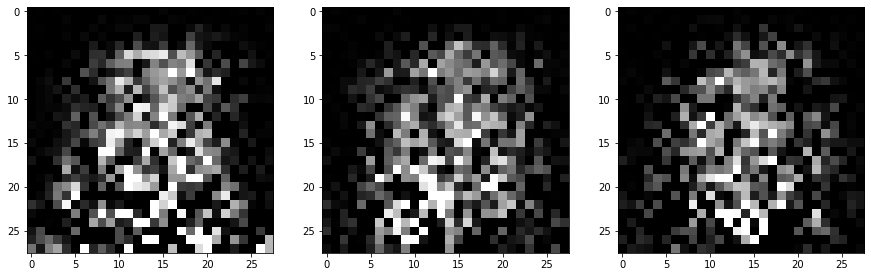

In [31]:
def get_sample_image():
    sample_image = mnist_mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28*28), lower=True)
    sample_image[sample_image < 0] = 0
    sample_image[sample_image > 1] = 1
    return sample_image.reshape(28, 28)

fig, axs = plt.subplots(1,3, figsize=(15, 15))
axs[0].imshow(get_sample_image(), cmap='gray')
axs[1].imshow(get_sample_image(), cmap='gray')
axs[2].imshow(get_sample_image(), cmap='gray')

### For reference, here is a training example

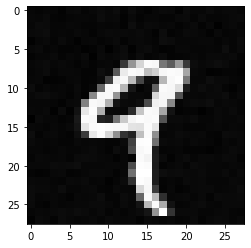

In [32]:
plt.imshow(mnist_train[4].reshape(28,28) + mnist_mean.reshape(28,28), cmap='gray')

### Loss curve during training

Text(0, 0.5, 'negative NCE log loss')

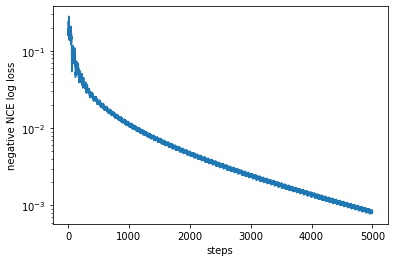

In [33]:
plt.plot(losses)
plt.yscale("log")
plt.xlabel("steps")
plt.ylabel("negative NCE log loss")

### Trained precision matrix

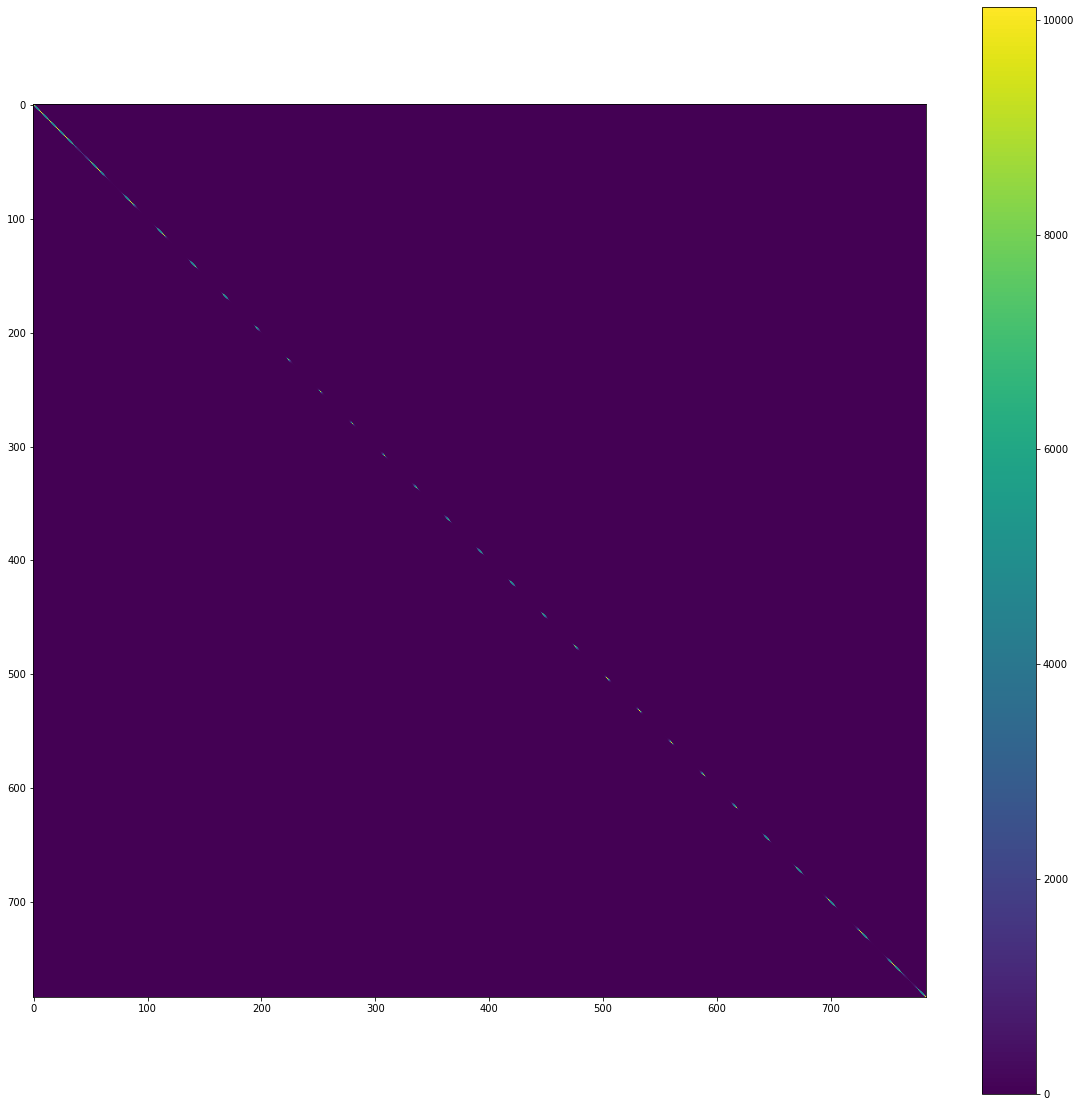

In [34]:
plt.figure(figsize = (20,20))
plt.imshow(precision_matrix)
plt.colorbar()

### Trained covariance matrix (inverse of precision matrix)

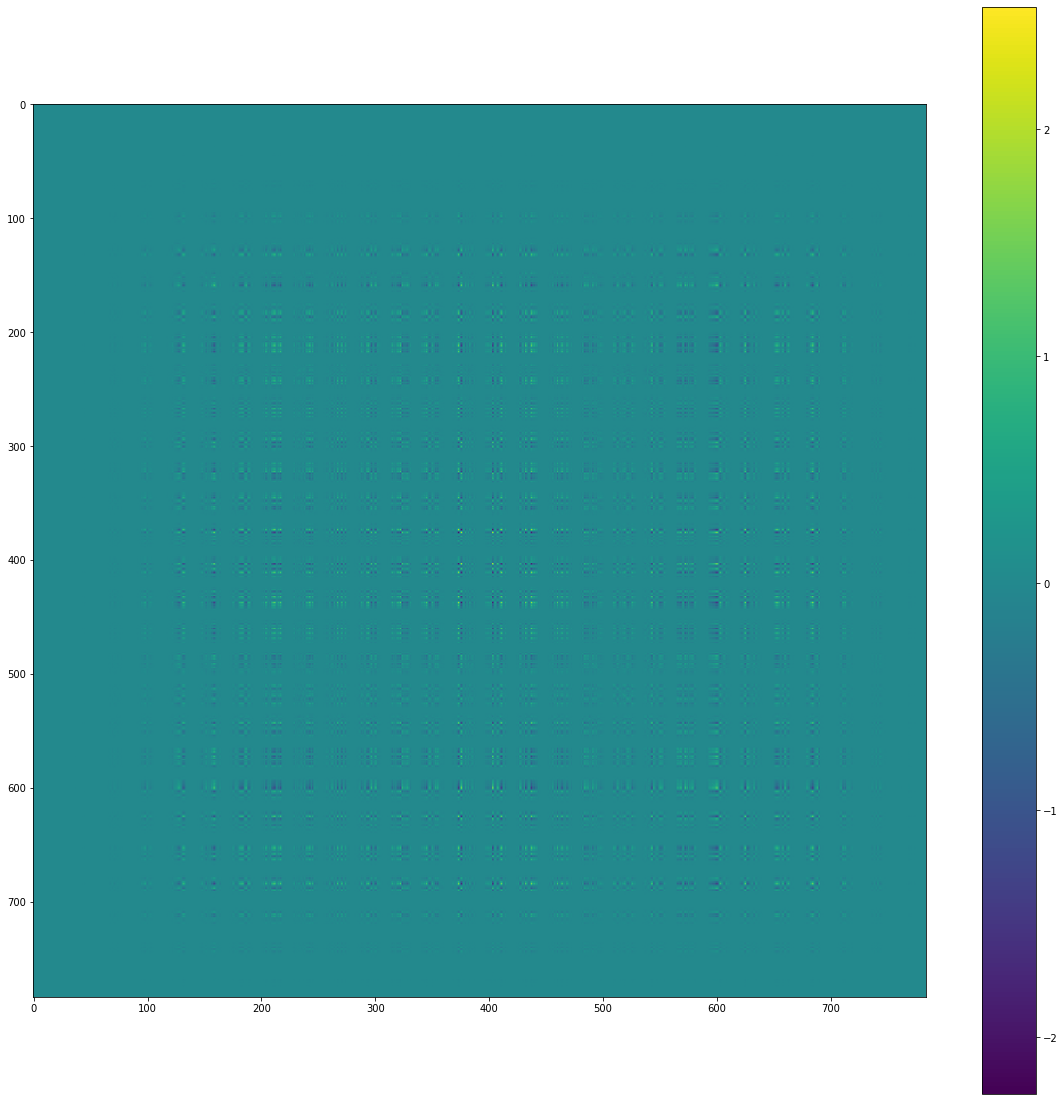

In [35]:
plt.figure(figsize = (20,20))
plt.imshow(np.linalg.inv(precision_matrix))
plt.colorbar()